<a href="https://colab.research.google.com/github/Arunima-Srivastav/Coursera_Capstone/blob/master/Coursera_Capstone_Week_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important Note 

This notebook is divided into three sections. Please refer to the big headings for these divisions. 

Thanks

# Part 1

Installing the modules

In [3]:
import pandas as pd 
%pip install wikipedia
import wikipedia as wp
from bs4 import BeautifulSoup



,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [5]:
# reading the file
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")

# determining the index of the tavle
df = pd.read_html(html, header = 0)[0]

# Remove cells with 'Not assigned' as the borough
df = df[df.Borough != 'Not assigned']

df.head() #cheking the progress

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [7]:
# Combining neighborhoods with the same postal code
df = df.groupby(['Postal Code', 'Borough'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. 
# So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.
for index, row in df.iterrows():
    if row['Neighborhood'] == 'Not assigned':
        row['Neighborhood'] = row['Borough']

# Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
df

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


In [6]:
# In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.
df.shape

(103, 3)

# Part 2

Importing the reuired modules

In [9]:
import requests
import io

Get the latitude and longitude coordinates of each of the neighborhoods

In [10]:
url="http://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

Renaming the first columns and merging dataframes

In [13]:
c.columns = ['Postal Code', 'Latitude', 'Longitude']
df = pd.merge(c, df, on='Postal Code')

Reorder the column names and display  the data frame




In [14]:
df = df[['Postal Code', 'Borough', 'Neighborhood', 'Latitude', 'Longitude']]
df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


# Part 3

Importing the required modules

In [21]:
from shapely.geometry import Point
%pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
print ("Imported everything!")

Imported everything!


Setting up the map & showing the plot

In [22]:
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


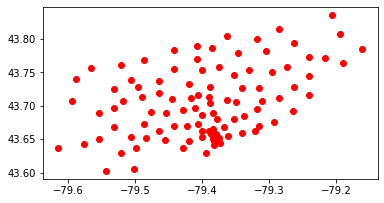

In [24]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')
plt.show()